In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime

#import the api key
from config import weather_api_key

In [2]:
#create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities = []

#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

592

In [5]:
#starting url for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | longhua
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | kijang
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | shache
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | baltasi
Processing Record 13 of Set 1 | jaciara
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | japura
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | mehamn
Processing Record 18 of Set 1 | kimbe
Processing Record 19 of Set 1 | bichena
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | yumen
Processing Record 24 of Set 1 | illoqqortoormiut
City not found. Skipping.

Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | agadez
Processing Record 45 of Set 4 | fare
Processing Record 46 of Set 4 | dakar
Processing Record 47 of Set 4 | wajima
Processing Record 48 of Set 4 | acapulco
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | tateyama
Processing Record 1 of Set 5 | seoul
Processing Record 2 of Set 5 | hervey bay
Processing Record 3 of Set 5 | yar-sale
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | lanivtsi
Processing Record 6 of Set 5 | batemans bay
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 5 | xunchang
Processing Record 10 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 5 | ploemeur
Processing Record 12 of Set 5 | mansoa
Processing Record 13 of Set 5 | fortuna
Processing Record 14 of Set 5 | namatanai
Processing Record 15 of S

Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | guiyang
Processing Record 36 of Set 8 | haizhou
Processing Record 37 of Set 8 | sassandra
Processing Record 38 of Set 8 | tecate
Processing Record 39 of Set 8 | marsa matruh
Processing Record 40 of Set 8 | ahuimanu
Processing Record 41 of Set 8 | macau
Processing Record 42 of Set 8 | igarka
Processing Record 43 of Set 8 | piacabucu
Processing Record 44 of Set 8 | krutinka
Processing Record 45 of Set 8 | hirara
Processing Record 46 of Set 8 | rincon
Processing Record 47 of Set 8 | quakenbruck
Processing Record 48 of Set 8 | marawi
Processing Record 49 of Set 8 | mazyr
Processing Record 50 of Set 8 | rawson
Processing Record 1 of Set 9 | naze
Processing Record 2 of Set 9 | velikiy ustyug
Processing Record 3 of Set 9 | sao jose da coroa grande
Processing Record 4 of Set 9 | moshenskoye
Processing Record 5 of Set 9 | mnogovershinnyy
Processing Record 6 of Set 9 | mandla
Processing Record 7 of Set 9 | umzimvubu
City not

Processing Record 22 of Set 12 | minab
Processing Record 23 of Set 12 | marystown
Processing Record 24 of Set 12 | corinto
Processing Record 25 of Set 12 | cheremshan
Processing Record 26 of Set 12 | san rafael
Processing Record 27 of Set 12 | manta
Processing Record 28 of Set 12 | nizhniy tsasuchey
Processing Record 29 of Set 12 | saint-louis
Processing Record 30 of Set 12 | olden
Processing Record 31 of Set 12 | dire dawa
Processing Record 32 of Set 12 | ulladulla
Processing Record 33 of Set 12 | koumac
Processing Record 34 of Set 12 | sterling
Processing Record 35 of Set 12 | yerbogachen
Processing Record 36 of Set 12 | asau
Processing Record 37 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 38 of Set 12 | kautokeino
Processing Record 39 of Set 12 | teguldet
Processing Record 40 of Set 12 | lae
Processing Record 41 of Set 12 | tarakan
Processing Record 42 of Set 12 | mattru
-----------------------------
Data Retrieval Complete      
-----------------------------

In [8]:
#convert the array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longhua,23.6137,114.1919,67.08,65,16,3.65,CN,2021-11-18 01:01:32
1,Jamestown,42.0970,-79.2353,62.02,69,1,8.99,US,2021-11-18 01:01:31
2,Port Blair,11.6667,92.7500,78.84,89,40,3.44,IN,2021-11-18 01:01:33
3,Kijang,35.2442,129.2139,56.14,33,0,1.97,KR,2021-11-18 01:01:33
4,Upernavik,72.7868,-56.1549,1.15,75,98,4.16,GL,2021-11-18 01:01:33
5,Puerto Ayora,-0.7393,-90.3518,68.36,82,55,7.47,EC,2021-11-18 01:01:34
6,Provideniya,64.3833,-173.3000,14.11,67,75,17.90,RU,2021-11-18 00:56:38
7,Butaritari,3.0707,172.7902,82.13,77,98,12.15,KI,2021-11-18 00:51:50
8,Tura,25.5198,90.2201,61.11,80,52,3.27,IN,2021-11-18 00:57:54
9,Shache,38.4167,77.2406,35.62,35,4,6.44,CN,2021-11-18 01:01:34


In [9]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

correct_city_data = city_data_df[new_column_order]

correct_city_data

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longhua,CN,2021-11-18 01:01:32,23.6137,114.1919,67.08,65,16,3.65
1,Jamestown,US,2021-11-18 01:01:31,42.0970,-79.2353,62.02,69,1,8.99
2,Port Blair,IN,2021-11-18 01:01:33,11.6667,92.7500,78.84,89,40,3.44
3,Kijang,KR,2021-11-18 01:01:33,35.2442,129.2139,56.14,33,0,1.97
4,Upernavik,GL,2021-11-18 01:01:33,72.7868,-56.1549,1.15,75,98,4.16
...,...,...,...,...,...,...,...,...,...
548,Kautokeino,NO,2021-11-18 01:14:32,69.0125,23.0412,32.94,98,100,7.45
549,Teguldet,RU,2021-11-18 01:14:32,57.3064,88.1667,12.07,94,100,4.70
550,Lae,PG,2021-11-18 01:14:32,-6.7221,146.9847,87.35,61,32,6.60
551,Tarakan,ID,2021-11-18 01:09:53,3.3000,117.6333,80.10,83,20,4.61


In [10]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#export the city_data into a csv
correct_city_data.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = correct_city_data["Lat"]
max_temps = correct_city_data["Max Temp"]
humidity = correct_city_data["Humidity"]
cloudiness = correct_city_data["Cloudiness"]
wind_speed = correct_city_data["Wind Speed"]

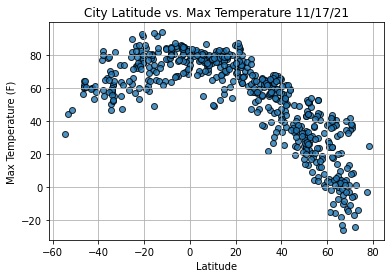

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

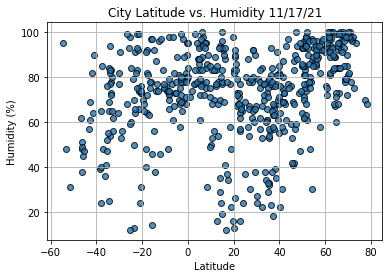

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

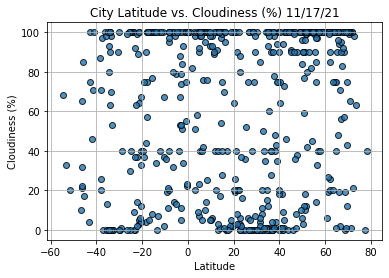

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

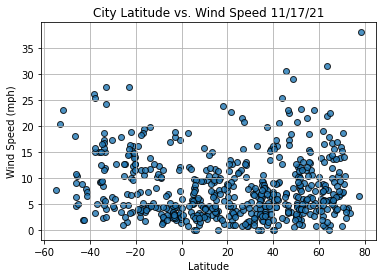

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = correct_city_data.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = correct_city_data.loc[(city_data_df["Lat"] < 0)]

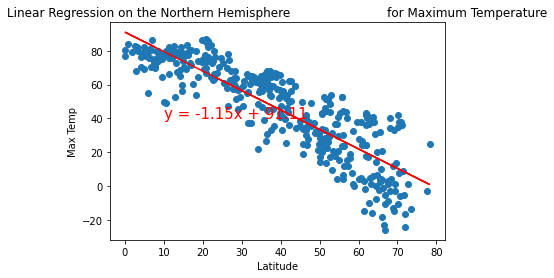

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

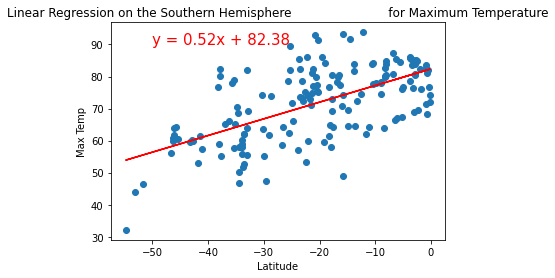

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

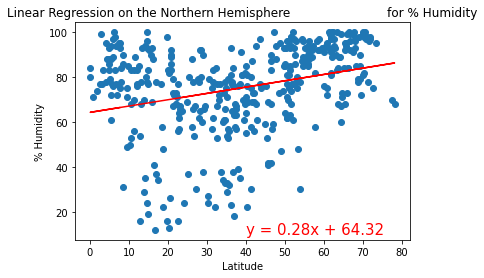

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

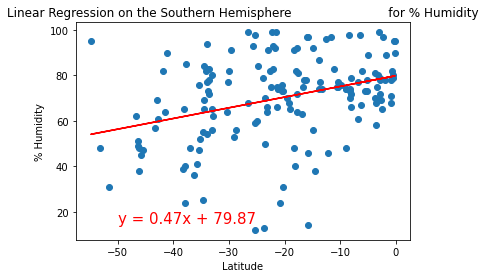

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

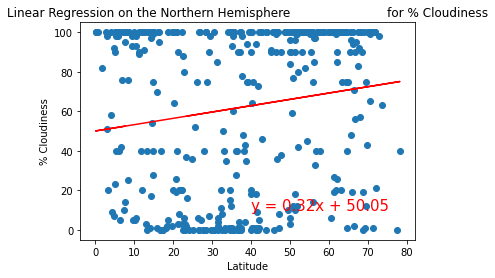

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

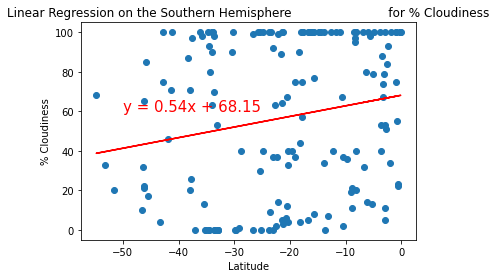

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

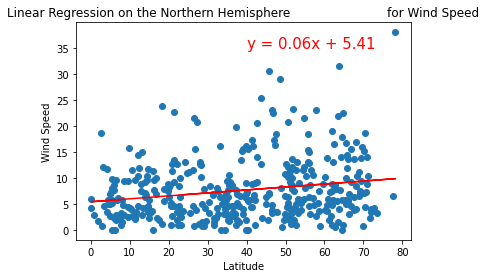

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

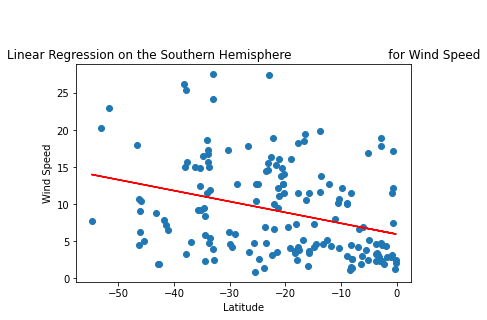

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 